# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import kagglehub
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# Download latest version of the dataset
path = kagglehub.dataset_download("adityakadiwal/water-potability")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'water-potability' dataset.
Path to dataset files: /kaggle/input/water-potability


# Task 1

## Load and describe dataset

In [7]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


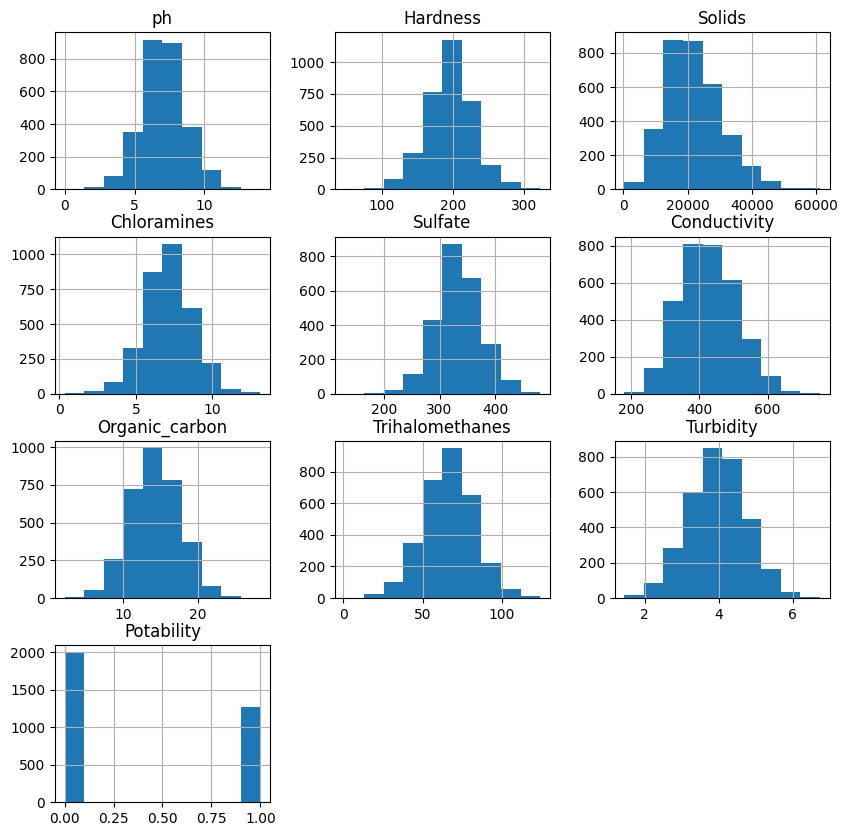

In [10]:
df.hist(figsize=(10, 10))
plt.show()

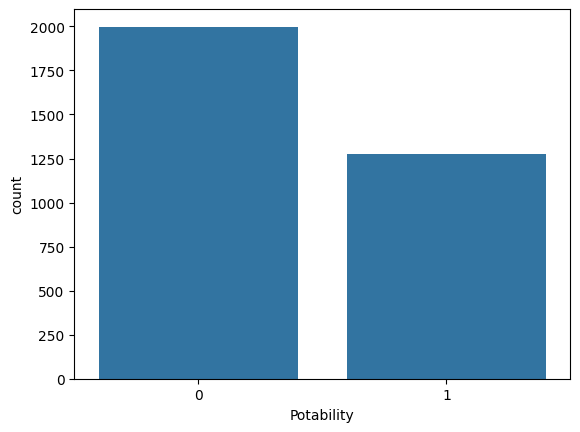

In [11]:
sns.countplot(x='Potability', data=df)
plt.show()

## Missing values per feature

In [12]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


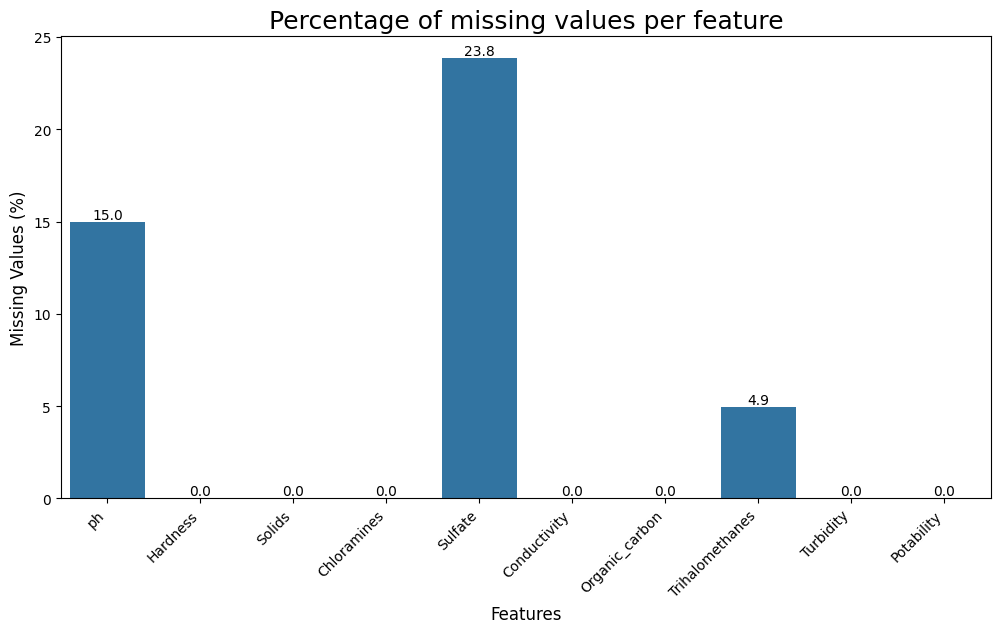

In [13]:
missing_percent = df.isnull().mean() * 100
missing_df = missing_percent.reset_index()
missing_df.columns = ['Feature', 'MissingPercentage']

fig = plt.figure(figsize=(12,6))
fig = sns.barplot(data=missing_df, x='Feature', y='MissingPercentage')
plt.title('Percentage of missing values per feature', fontsize=18)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
fig.bar_label(fig.containers[0], fmt='%.1f')
plt.show()

## Dataset quality evaluation

The plot shows that there are 3 features in the dataset that have missing values. The highest proportion of missing data occurs in Sulfate (23.8%, 2781 entries), followed by pH (15%, 491 entries), and Trihalomethanes (4.9%, 162 entries).

This shows that the dataset has a considerable amount of missing data, which reduces its quality in its raw form. Since there is a large number of missing values, simply dropping them would result in significant data loss. Therefore, it’s better to apply an imputation technique, such as filling missing values with the mean or median of each column, to preserve as much information as possible.


# Task 2

## Percentage of Drinkable vs Undrinkable water by pH group

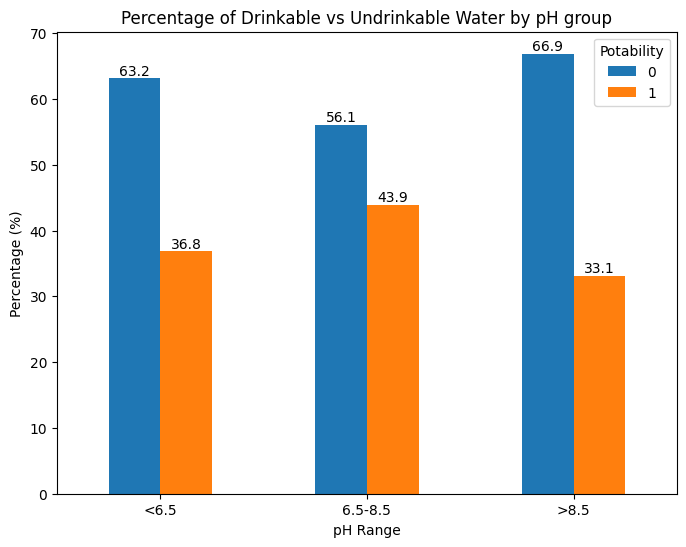

In [14]:
ph_groups = pd.cut(df['ph'], bins=[0, 6.5, 8.5, 14], labels=['<6.5', '6.5-8.5', '>8.5'])
potability_per_ph = (
    df.groupby(ph_groups)['Potability']
      .value_counts(normalize=True)
      .mul(100)
      .unstack()   # makes columns 0 and 1
)
fig = potability_per_ph.plot(kind='bar', figsize=(8,6))
plt.title('Percentage of Drinkable vs Undrinkable Water by pH group')
plt.xlabel('pH Range')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
# percentage labels above each bar
for container in fig.containers:
    fig.bar_label(container, fmt='%.1f')
plt.show()

The results partially verify the WHO guideline.
Water with pH values between 6.5 and 8.5 has the highest proportion of potable samples, confirming that this range is generally optimal for drinkable water.

However, since even within this safe range less than half (≈44%) of samples are actually potable, it’s clear that pH alone is not a sufficient determinant of potability. Other factors also play major roles.

# Task 3

##  PH vs Chloramines

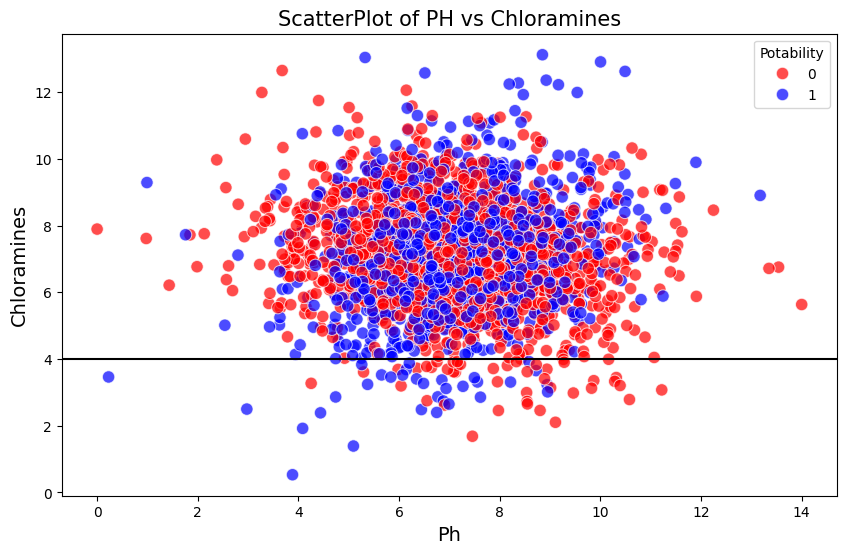

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['ph'], y=df['Chloramines'], s=80,alpha=0.7, hue=df['Potability'],palette={0: 'red', 1: 'blue'})
plt.title('ScatterPlot of PH vs Chloramines', fontsize=15)
plt.axhline(4, color='black')
plt.xlabel('Ph', fontsize=14)
plt.ylabel('Chloramines', fontsize=14)
plt.show()

Although these two features are relevant for water quality, they do not show strong separability between potable and non-potable samples. To accurately predict potability, additional features would likely need to be considered together.

# Task 4

## Imputation technique: filling missing values with the mean value

In [16]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [17]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Task 5

## Spit train-test set

In [18]:
input_df = df.drop(columns=['Potability'])
targets_df = df['Potability']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((3276, 9), (3276,))

In [19]:
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# Task 6

## Decision Tree

In [20]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)
print(f'Test set accuracy: {accuracy_percentage}')

Test set accuracy: 57.78


In [22]:
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy_percentage = round(train_accuracy*100, 2)
print(f'Training set accuracy: {train_accuracy_percentage}%')

Training set accuracy: 100.0%


Decision trees are prone to overfitting. As we can see above the model performs very well in the training set, but achieves a much lower performance in the test set, indicating overfitting.

# Task 7

## Accuracy evaluation of Decision Tree models under different parameter settings

In [23]:
x = df.drop(columns=['Potability']).to_numpy()
y = df['Potability'].to_numpy()
seed = 0
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0, 0.01]
}

# create all combinations
combinations = list(product(
    params['criterion'],
    params['max_depth'],
    params['min_samples_split'],
    params['min_samples_leaf'],
    params['max_features'],
    params['ccp_alpha']
))

results = []

for combo in combinations:
    criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha = combo

    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        ccp_alpha=ccp_alpha,
        random_state=seed
    )

    model.fit(x_train, y_train)

    # train and test predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'ccp_alpha': ccp_alpha,
        'train_acc': round(train_acc*100,2),
        'test_acc': round(test_acc*100,2)
    })

results_df = pd.DataFrame(results)
# sort by best test accuracy
results_df = results_df.sort_values(by='test_acc', ascending=False).reset_index(drop=True)
results_df

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
0,entropy,5.0,5,2,None,0.0,67.12,65.51
1,entropy,5.0,2,2,None,0.0,67.12,65.51
2,entropy,5.0,2,1,None,0.0,67.16,65.41
3,entropy,5.0,5,1,None,0.0,67.16,65.41
4,gini,5.0,2,2,None,0.0,66.20,64.39
...,...,...,...,...,...,...,...,...
91,entropy,NaN,5,2,None,0.0,96.25,57.88
92,entropy,NaN,2,1,None,0.0,100.00,57.78
93,gini,NaN,2,1,None,0.0,100.00,57.48
94,entropy,NaN,5,1,None,0.0,97.65,57.48


The best decision tree results were obtained using entropy as the splitting criterion, with a max depth of 5 and combinations of (2,1) or (5,2) slightly affect train/test accuracy. Also, using all features and no pruning lets the tree explore all available splits, which helps slightly with accuracy.
The model achieved training accuracy ~67% and test accuracy ~65.5%, indicating that a slightly deeper tree captures more patterns than a shallow tree while maintaining generalization.

# Task 8

## Analysis of the combination with highest test accuracy and max_depth=3

Best hyperparameters with max_depth=3:
 criterion            entropy
max_depth                3.0
min_samples_split          2
min_samples_leaf           1
max_features            None
ccp_alpha                0.0
train_acc              64.11
test_acc               63.99
Name: 8, dtype: object


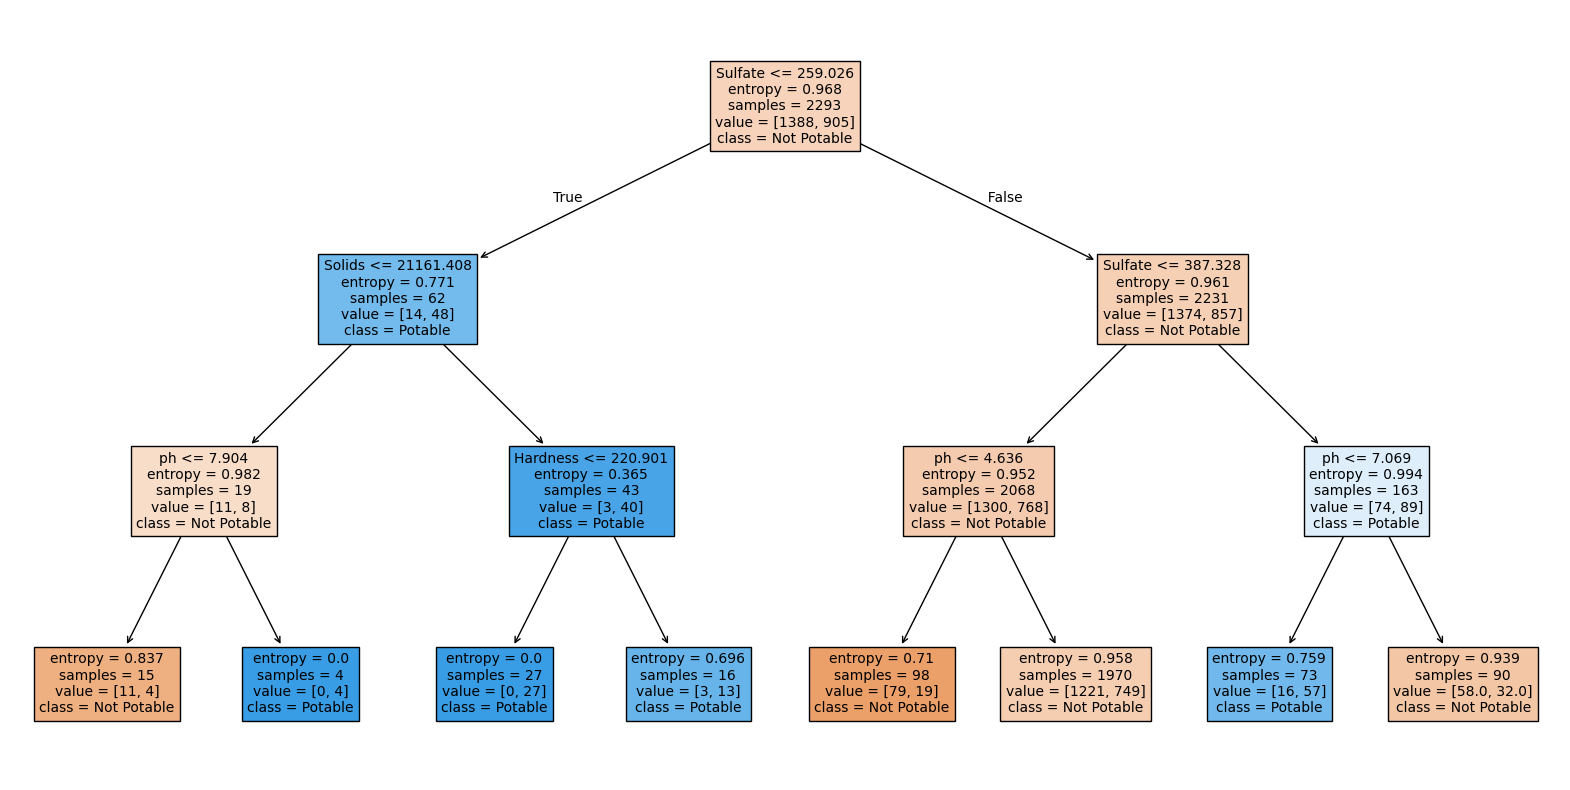

In [24]:
# filter combinations with max_depth = 3
depth3_df = results_df[results_df['max_depth'] == 3]

# select the combination with highest test accuracy
best_combo = depth3_df.loc[depth3_df['test_acc'].idxmax()]
print("Best hyperparameters with max_depth=3:\n", best_combo)

# train the tree with this combination
model = DecisionTreeClassifier(
    criterion=best_combo['criterion'],
    max_depth=int(best_combo['max_depth']) if best_combo['max_depth'] is not None else None,
    min_samples_split=int(best_combo['min_samples_split']),
    min_samples_leaf=int(best_combo['min_samples_leaf']),
    max_features=best_combo['max_features'],
    ccp_alpha=best_combo['ccp_alpha'],
    random_state=0
)

model.fit(x_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=df.drop(columns=['Potability']).columns,
    class_names=['Not Potable', 'Potable'],
    filled=True,
    fontsize=10
)
plt.show()

The best max-depth=3 tree (using entropy) gives balanced train/test performance (~64%), meaning it generalizes well but is too simple to fully capture the complexity of water potability. This makes it highly interpretable but only moderately accurate.

Sulfate is the primary determinant of water safety and high sulfate has higher chance of contamination.
Very low and high pH values reduce potability. Solids and Hardness play secondary roles.
Water with low sulfate (<259) and neutral pH (~7–8) is most likely potable, whereas high sulfate (>259) and acidic pH (<5) strongly predict non-potable water.

# Task 9-10

## Feature importance

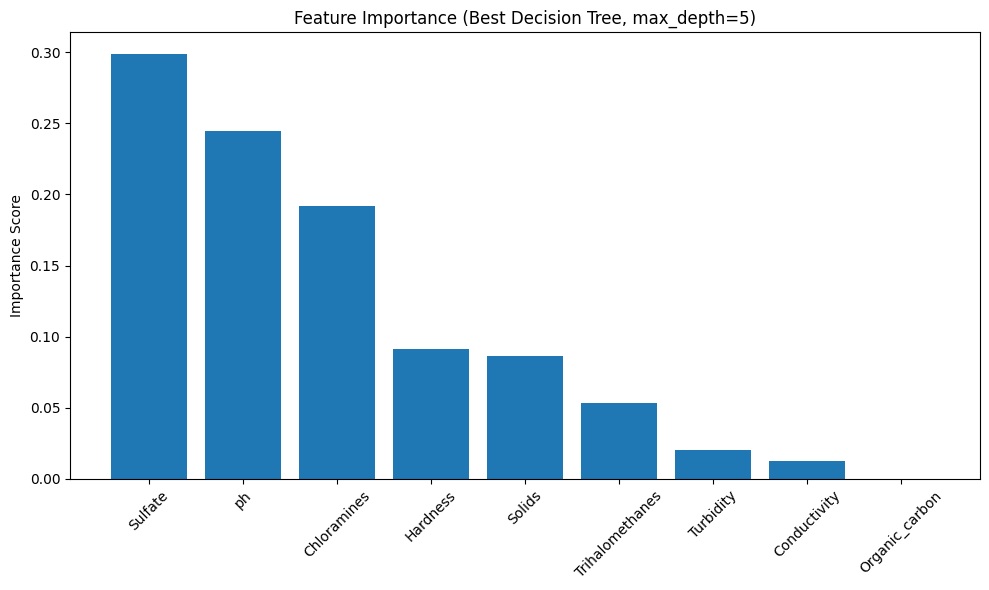

,0
Sulfate,0.298956
ph,0.244768
Chloramines,0.191956
Hardness,0.091392
Solids,0.086400


In [28]:
x = df.drop(columns=['Potability'])
y = df['Potability']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# retrain the best model based on task 8 results
best_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    ccp_alpha=0.0,
    random_state=0
)
best_model.fit(x_train, y_train)

# feature importances
importances = pd.Series(best_model.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(importances.index, importances.values)
plt.title('Feature Importance (Best Decision Tree, max_depth=5)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

importances.head(5)

The most important features are Sulfate, ph, Chloramines, Hardness and Solids.

# Task 11

## Decision tree vs Random forest

Decision trees are prone to overfitting, and they are unstable to noisy data (outliers, missing values) or unbalanced casses, so they often don't generalize well. Random forest builds many decision trees using a random subset of features when splitting, this randomness makes the trees diverse. In the dataset, there’s missing data (imputed with mean values) and the classes (potable vs non-potable) are  imbalanced. A single tree might overfit these imperfections and not be able to generalise, a Random Forest smooths out those overly specific splits, captures broader trends and might give more stable and accurate predictions.*κείμενο σε πλάγια γραφή*

# Task 12

## Random forest

In [29]:
x = df.drop(columns=['Potability'])
y = df['Potability']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
n_estimators_list = [50, 100, 200]
results = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=0)
    model.fit(x_train, y_train)

    train_acc = model.score(x_train, y_train) * 100
    test_acc = model.score(x_test, y_test) * 100

    results.append({
        "n_estimators": n,
        "train_acc": round(train_acc, 2),
        "test_acc": round(test_acc, 2)
    })

results_df = pd.DataFrame(results)
results_df

,n_estimators,train_acc,test_acc
0,50,100.0,69.38
1,100,100.0,69.79
2,200,100.0,68.97


The test accuracy is around 69%, which indicates good generalization and suggests that the model is not overfitting. Using 100 estimators provides slightly better accuracy than using 50. Increasing the number of estimators to 200 results in a small drop in test accuracy, likely due to random variation, which is not significant. Overall, these accuracy results are better than those achieved with individual decision trees (~65%), as we anticipated.

In [30]:
params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0, 0.01]
}

# create all combinations
combinations = list(product(
    params['n_estimators'],
    params['criterion'],
    params['max_depth'],
    params['min_samples_split'],
    params['min_samples_leaf'],
    params['max_features'],
    params['ccp_alpha']
))

results = []
for combo in combinations:
    n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, max_features, ccp_alpha = combo

    model = RandomForestClassifier(
         n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        ccp_alpha=ccp_alpha,
        random_state=0
    )

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'ccp_alpha': ccp_alpha,
        'train_acc': round(train_acc*100,2),
        'test_acc': round(test_acc*100,2)
    })

results_df = pd.DataFrame(results)
# sort by best test accuracy
results_df = results_df.sort_values(by='test_acc', ascending=False).reset_index(drop=True)
results_df

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
0,100,gini,NaN,2,1,sqrt,0.00,100.00,69.79
1,200,entropy,NaN,5,2,sqrt,0.00,99.96,69.38
2,50,gini,NaN,2,1,sqrt,0.00,100.00,69.38
3,200,entropy,NaN,2,1,sqrt,0.00,100.00,69.28
4,200,gini,NaN,2,1,sqrt,0.00,100.00,68.97
...,...,...,...,...,...,...,...,...,...
283,50,gini,5.0,5,2,sqrt,0.01,60.53,62.05
284,50,gini,5.0,2,2,sqrt,0.01,60.53,62.05
285,50,gini,3.0,5,2,sqrt,0.01,60.53,62.05
286,50,gini,3.0,2,2,sqrt,0.01,60.53,62.05


# Task 13

## Importance of correctly identifying unsafe water

Predicting unsafe water correctly is critical, misclassifying unsafe water as safe is far more dangerous than the opposite.
It is more important to accurately predict non-potable water to avoid putting people at risk. Losing some accuracy in predicting potable water is acceptable because it is safer to avoid safe water unnecessarily than to consume unsafe water.

# Task 14

## Legal and reliability advantages of the Random Forest model

Random Forest is legally safer. It is more accurate overall based on the results (Decision Tree test accuracy: ~65%, Random Forest test accuracy: ~69%) and
higher accuracy, especially for detecting unsafe water, reduces the risk of legal liability due to people consuming contaminated water.
Also, Random Forest is more stable and less sensitive to data noise. Even though a single tree is easier to explain, the legal risk from misclassification outweighs the simplicity benefit.